In [28]:
import pandas as pd
import numpy as np

In [29]:
df = pd.read_csv("./Random_Forest_Dataset_Pima.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [30]:
x = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [31]:
# standardinsing the data using fit transform
from sklearn.preprocessing import StandardScaler
x_scaled = StandardScaler().fit_transform(x)

In [32]:
# creating training and testing data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2)

In [33]:
# creating and training decison tree model
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier()

model1.fit(x_train, y_train)

y_predicted1 = model1.predict(x_test)

In [34]:
# printing accuracy score of decision tree
from sklearn.metrics import accuracy_score
print("decsion tree : ", accuracy_score(y_test, y_predicted1))

decsion tree :  0.7142857142857143


In [35]:
# creating and training random forest classifier
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()

model2.fit(x_train, y_train)

y_predicted2 = model2.predict(x_test)

In [36]:
# printing accuracy score of random forest
from sklearn.metrics import accuracy_score
print("decsion tree : ", accuracy_score(y_test, y_predicted2))

decsion tree :  0.8376623376623377


In [52]:
# creating dataframe for feature importance
feature_importance_df = pd.DataFrame()
feature_importance_df["features"] = x.columns
feature_importance_df["importance"] = model2.feature_importances_

feature_importance_df.sort_values("importance")

,features,importance
4,Insulin,0.072182
3,SkinThickness,0.073006
0,Pregnancies,0.082802
2,BloodPressure,0.093164
6,DiabetesPedigreeFunction,0.120472
7,Age,0.140743
5,BMI,0.162360
1,Glucose,0.255271


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Pregnancies'),
  Text(1, 0, 'Glucose'),
  Text(2, 0, 'BloodPressure'),
  Text(3, 0, 'SkinThickness'),
  Text(4, 0, 'Insulin'),
  Text(5, 0, 'BMI'),
  Text(6, 0, 'DiabetesPedigreeFunction'),
  Text(7, 0, 'Age')])

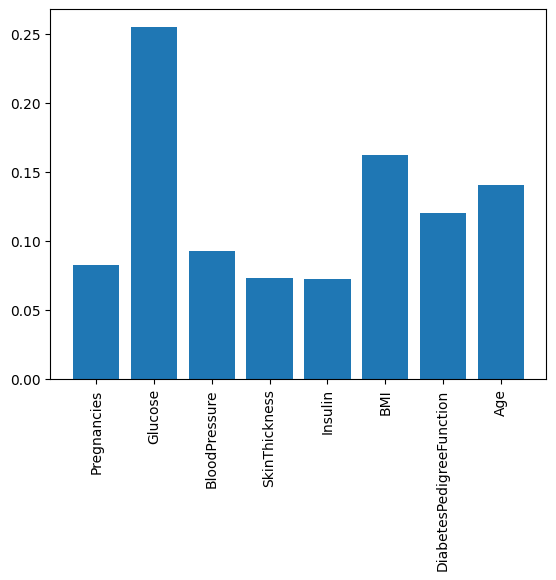

In [59]:
import matplotlib.pyplot as plt
plt.bar(feature_importance_df["features"], feature_importance_df["importance"])
plt.xticks(rotation=90)